In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'your-dataset.csv' with your actual dataset file path)
df = pd.read_csv('/home/likola/Desktop/seminary programing /lab2/test.csv')

# Dataset Info
print("Dataset Info:")
df.info()  # Shows metadata (number of rows, columns, data types, etc.)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Fill missing values or drop rows with missing data (adjust based on your dataset)
df.fillna(method='ffill', inplace=True)  # Forward fill for missing data (or use df.dropna())

# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

Missing Values in Each Column:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

First 5 Rows of 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Metadata and Initial Data Exploration
- The `info()` function provides us with the structure of the dataset, including the number of rows, columns, and data types of each feature.
- We also check for missing values in the dataset and handle them using forward-fill (`fillna()`), ensuring the data is complete for analysis.
- The first 5 rows of the dataset are displayed for an initial overview of the data.

Numerical Columns in the Dataset: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Descriptive Statistics for Numerical Variables:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   30.125000    0.447368    0.392344   35.560845
std     120.810458    0.841838   13.905601    0.896760    0.981429   55.856972
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   22.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.471875
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


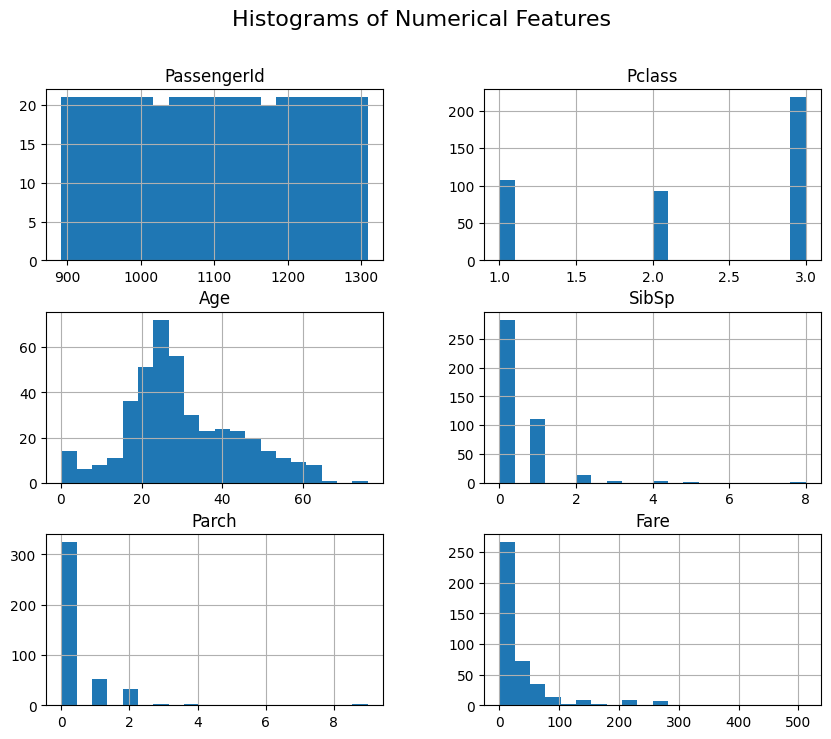

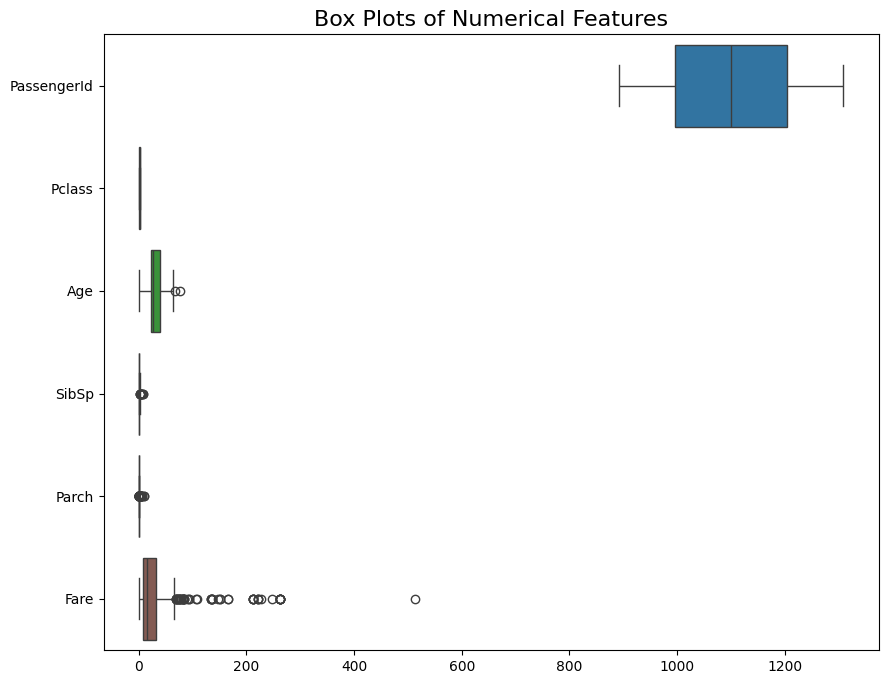

In [5]:
# Select numerical columns only
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical Columns in the Dataset:", numerical_columns)

# Descriptive Statistics for Numerical Variables
print("\nDescriptive Statistics for Numerical Variables:")
print(df[numerical_columns].describe())  # Summary statistics for numerical columns

# Plot Histogram for Numerical Variables
df[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Plot Box Plots to check for outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title("Box Plots of Numerical Features", fontsize=16)
plt.show()


### Descriptive Statistics for Numerical Variables
- The summary statistics give us a snapshot of the numerical columns, including mean, median, minimum, maximum, and quartile values.
- Histograms allow us to visualize the distribution of each numerical variable. Some features may show normal distributions, while others might be skewed.
- Box plots help identify outliers in the dataset. Outliers are extreme values that deviate significantly from other observations.
- The correlation matrix and heatmap display the linear relationships between the numerical features. A high correlation (positive or negative) can indicate relationships worth exploring.


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


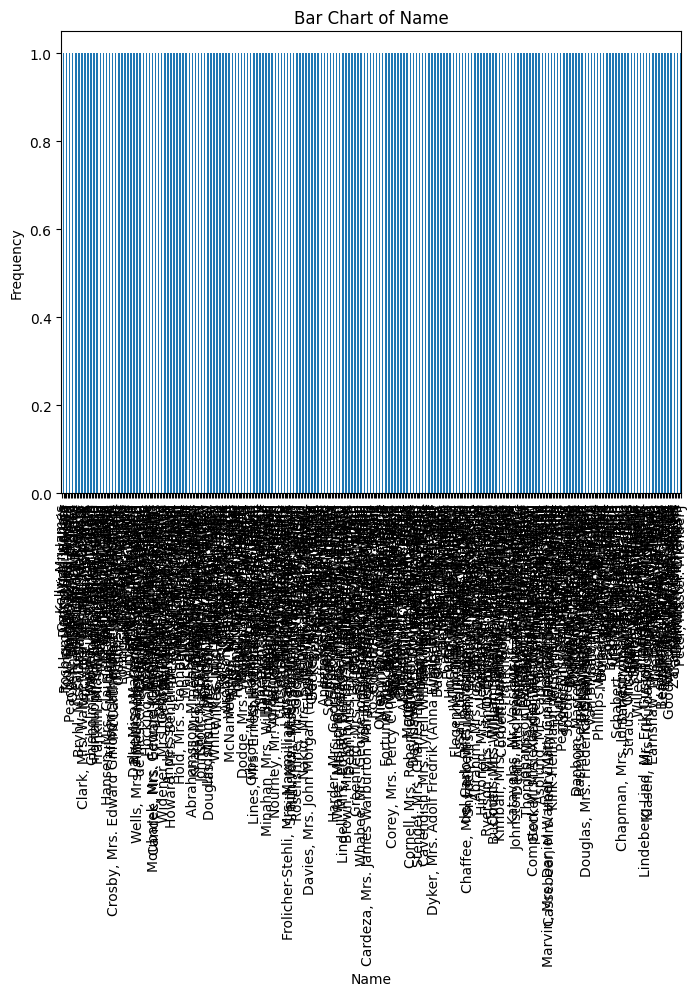

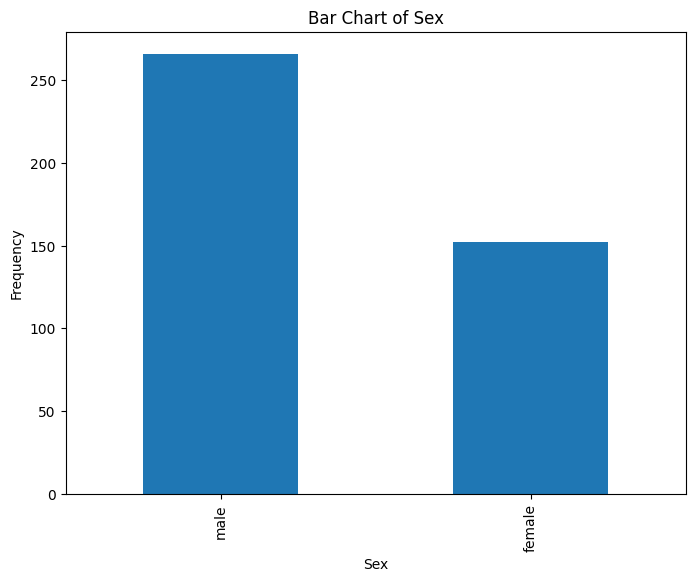

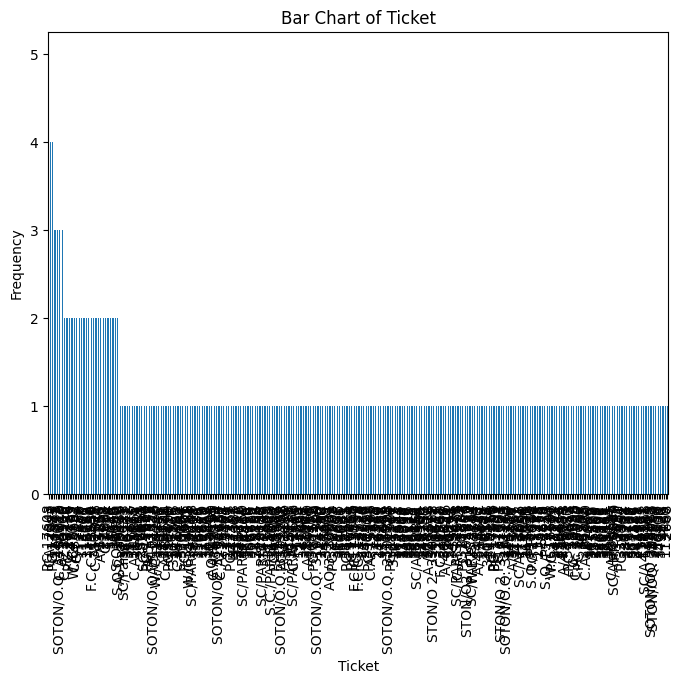

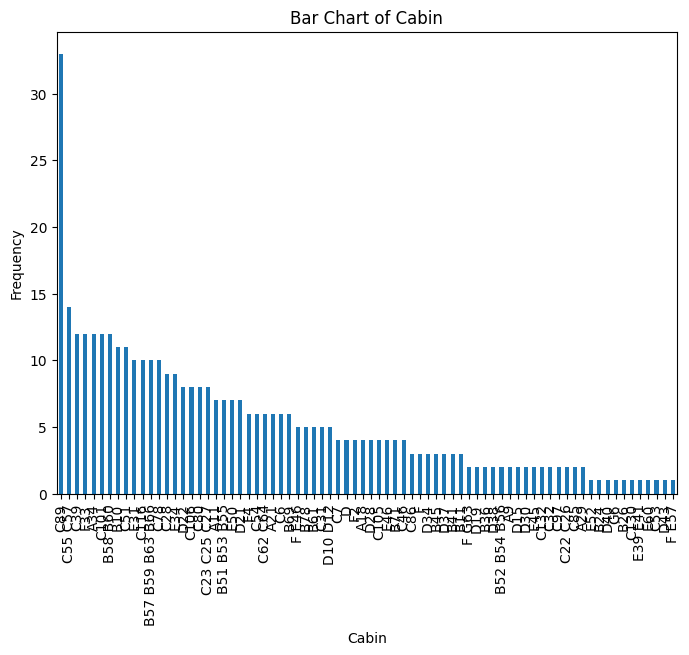

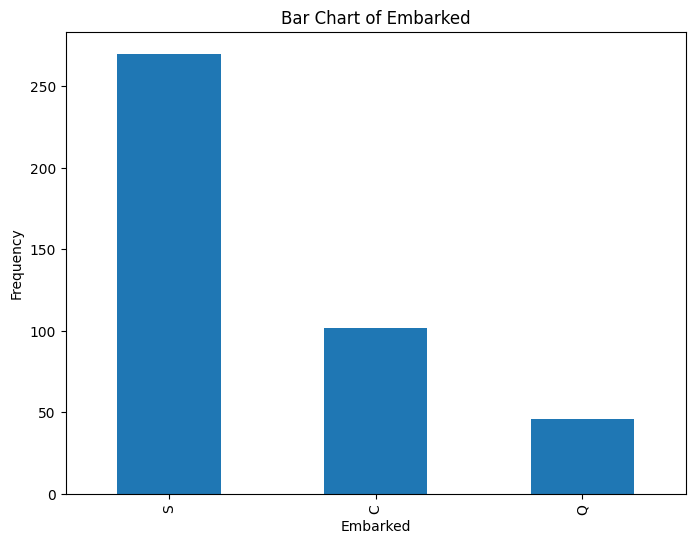

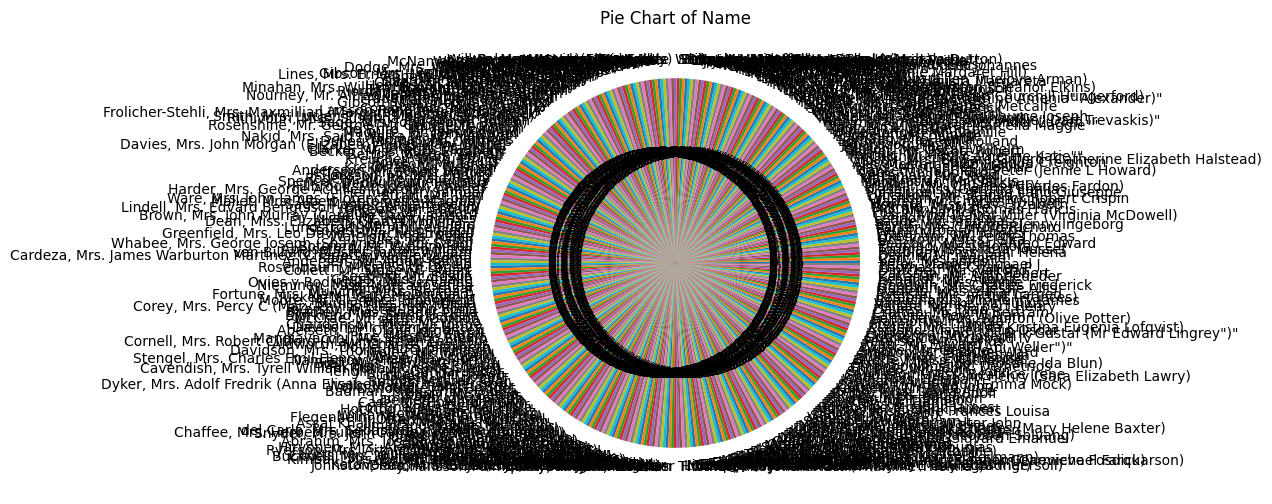

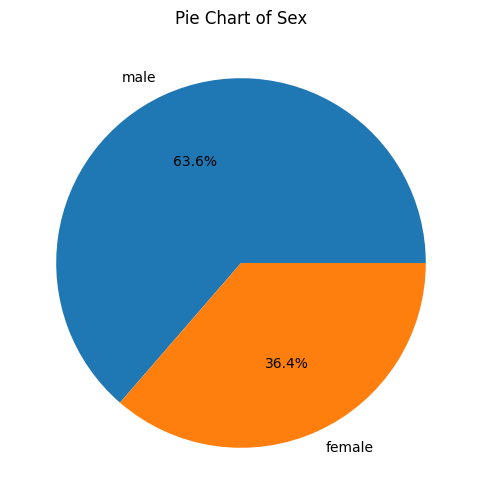

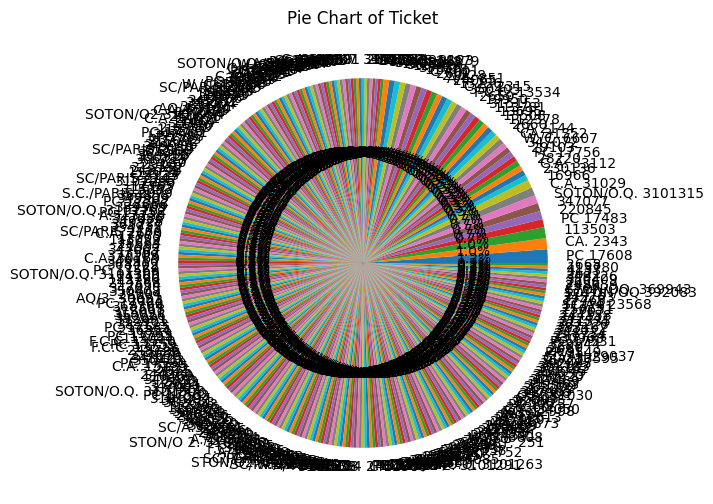

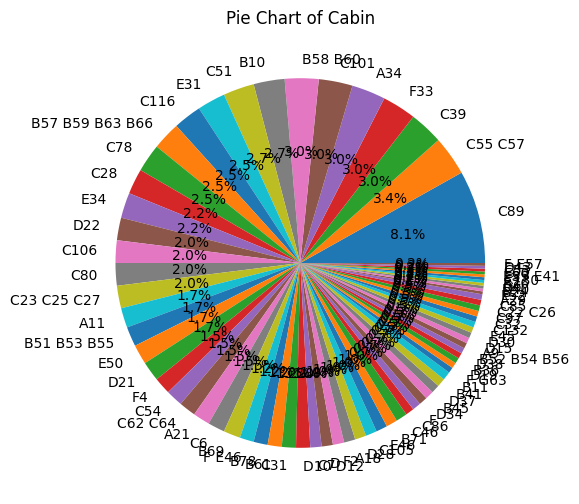

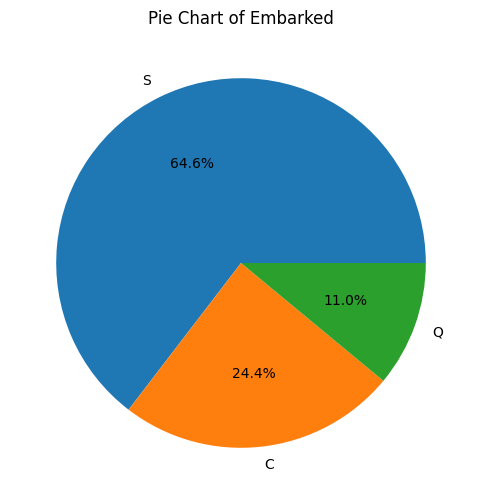

In [6]:
# Descriptive Statistics for Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"\nCategorical Columns: {list(categorical_columns)}")

# Bar Chart for each Categorical Variable
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title(f"Bar Chart of {col}")
    plt.ylabel("Frequency")
    plt.show()

# Pie Chart for each Categorical Variable
for col in categorical_columns:
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")  # Hide y-axis label
    plt.show()

### Descriptive Statistics for Categorical Variables
- Categorical variables represent non-numeric data, such as labels or categories.
- The bar charts show the absolute frequencies of each category within the categorical variables, providing insight into the most frequent or dominant categories.
- Pie charts give a visual representation of the relative frequencies (percentages) of the categories, helping us understand the distribution of values.

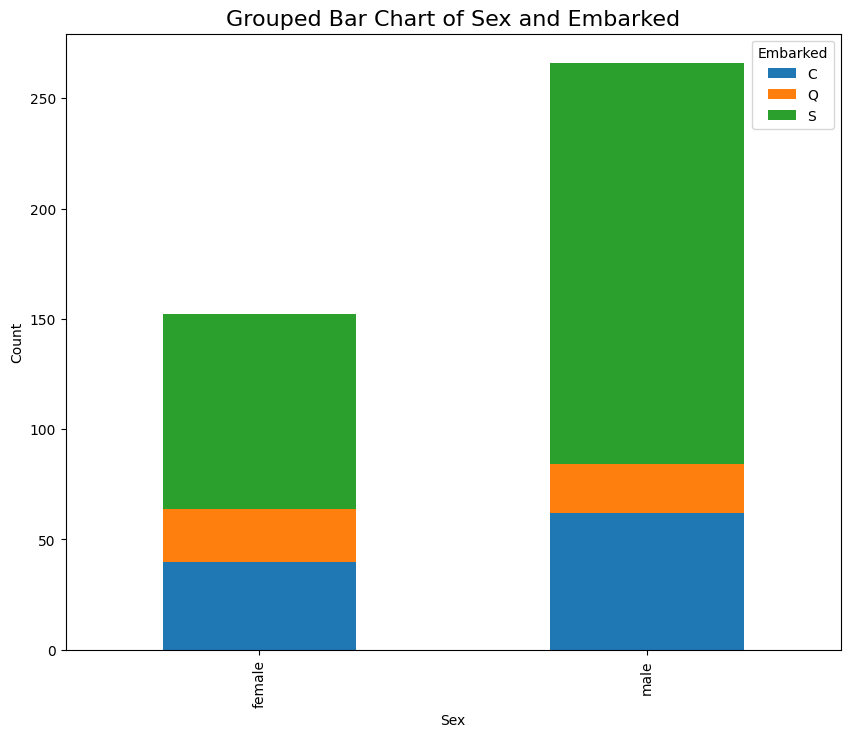

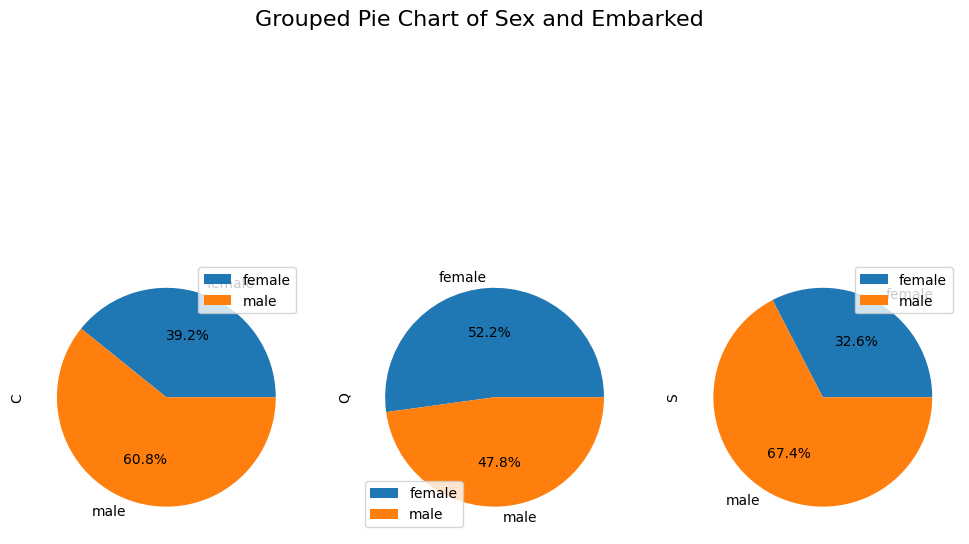

In [9]:
# Grouped Analysis of Two Categorical Variables
category_1 = 'Sex'       # First categorical column
category_2 = 'Embarked'  # Second categorical column

# Group the data and unstack
grouped_data = df.groupby([category_1, category_2]).size().unstack()

# Grouped Bar Chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f"Grouped Bar Chart of {category_1} and {category_2}", fontsize=16)
plt.ylabel("Count")
plt.show()

# Grouped Pie Chart
grouped_data.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12, 8))
plt.suptitle(f"Grouped Pie Chart of {category_1} and {category_2}", fontsize=16)
plt.show()
